# Explore the reference network


- [Crossref](https://www.crossref.org/) provides an API to get the references of a publication ([rest-api-doc](https://github.com/CrossRef/rest-api-doc)).


- The idea is to go down the references network for a fixed number of steps (for example 3), then keep only the articles which have been visited more than N times (for examples 3 times), and draw the upward graph starting from these articles. 


## To do:
- remove MetaData class
- resolve identical label
- stats:  n ref vs n citation, review vs foundational
- coloring: disconnected component for the 1st generation references, authors based cluster 
- interactive app + flask

- With multiple sources ?

### With more data:
- use 'store' from scopus manual export + [query ref resolver](https://www.crossref.org/labs/resolving-citations-we-dont-need-no-stinkin-parser/), https://search.crossref.org/references

- get country/city/univ  get flag/favicon


### with scopus 'cited by':
- doi list cited by  + cited by count
- query each
- graph


In [1]:
import crossrefexp as exp

In [7]:
store = exp.MetaDataStore('data/cachemetadata.pickle')

default pickle location set to data/cachemetadata.pickle


In [8]:
doi = "10.1103/PhysRevA.62.012306"

In [9]:
# Query metadata on Crossref
store.query([doi])
print( '\n', store.get_info(doi) )

metadata for 10.1103/PhysRevA.62.012306 retrieved from Crossref in 0.449753 s.
data/cachemetadata.pickle saved.

 Electron-spin-resonance transistors for quantum computing in silicon-german...
(2000) Physical Review A
Rutger Vrijen, Eli Yablonovitch, Kang Wang, Hong Wen Jiang, Alex Balandin, Vwani Roychowdhury, Tal Mor, David DiVincenzo
35 references - 31 with doi



growth achieved - 32 nodes in the graph. The last generation number is 1.
growth achieved - 340 nodes in the graph. The last generation number is 2.
graphs/Vrijen2000_gen2_top15.svg  saved


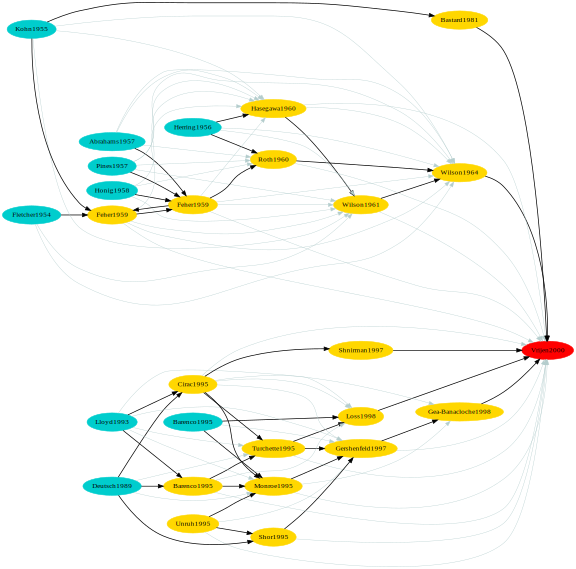

In [12]:
# Build the graph and everything:
gr = store.get_refgraphviz( doi, gen=2, top=15 )
gr

In [13]:
# List of the top cited refs.
gr = store.build_a_refgraph( doi, gen=2 )
print('-- Top cited: --')
for doi, citedby_count in gr.most_cited()[:10]:
    metadata = store.get(doi)
    print( '{}\t cited {} times [gen{}]  {}'.format(metadata.label(),
                                                   citedby_count, 
                                                   gr[doi]['gen'],
                                                   metadata.get('URL')) )

growth achieved - 32 nodes in the graph. The last generation number is 1.
growth achieved - 340 nodes in the graph. The last generation number is 2.
-- Top cited: --
Cirac1995	 cited 7 times [gen1]  http://dx.doi.org/10.1103/physrevlett.74.4091
Feher1959	 cited 6 times [gen1]  http://dx.doi.org/10.1103/physrev.114.1245
Lloyd1993	 cited 6 times [gen2]  http://dx.doi.org/10.1126/science.261.5128.1569
Feher1959	 cited 5 times [gen1]  http://dx.doi.org/10.1103/physrev.114.1219
Deutsch1989	 cited 5 times [gen2]  http://dx.doi.org/10.1098/rspa.1989.0099
Pines1957	 cited 5 times [gen2]  http://dx.doi.org/10.1103/physrev.106.489
Kohn1955	 cited 5 times [gen2]  http://dx.doi.org/10.1103/physrev.98.915
Herring1956	 cited 4 times [gen2]  http://dx.doi.org/10.1103/physrev.101.944
Barenco1995	 cited 4 times [gen1]  http://dx.doi.org/10.1103/physrevlett.74.4083
Honig1958	 cited 4 times [gen2]  http://dx.doi.org/10.1103/physrevlett.1.275
